In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [13]:
freq = "1H"

min    max  mean  jitter  n_threshold      n  pct_above_threshold
day hour                                                                    
19  13    17.9  377.2  34.2    30.1          212   4800                 4.42
    14    18.3  376.9  35.2    31.2          850  19400                 4.38
    15    19.8  370.5  35.3    30.4          833  19400                 4.29
    16    19.8  359.0  35.7    29.5          847  19400                 4.37
    17    19.9  348.0  35.4    28.5          741  17100                 4.33
...        ...    ...   ...     ...          ...    ...                  ...
22  11    32.8   51.2  34.1     1.6            2  19300                 0.01
    12    33.0   53.2  34.9     1.8            0  19400                 0.00
    13    33.8   56.2  35.6     2.0            3  19300                 0.02
    14    34.3   54.7  36.1     2.0            1  19300                 0.01
    15    34.8   53.7  36.5     2.1            0   3700                 0.00

[74 rows x 7 columns]

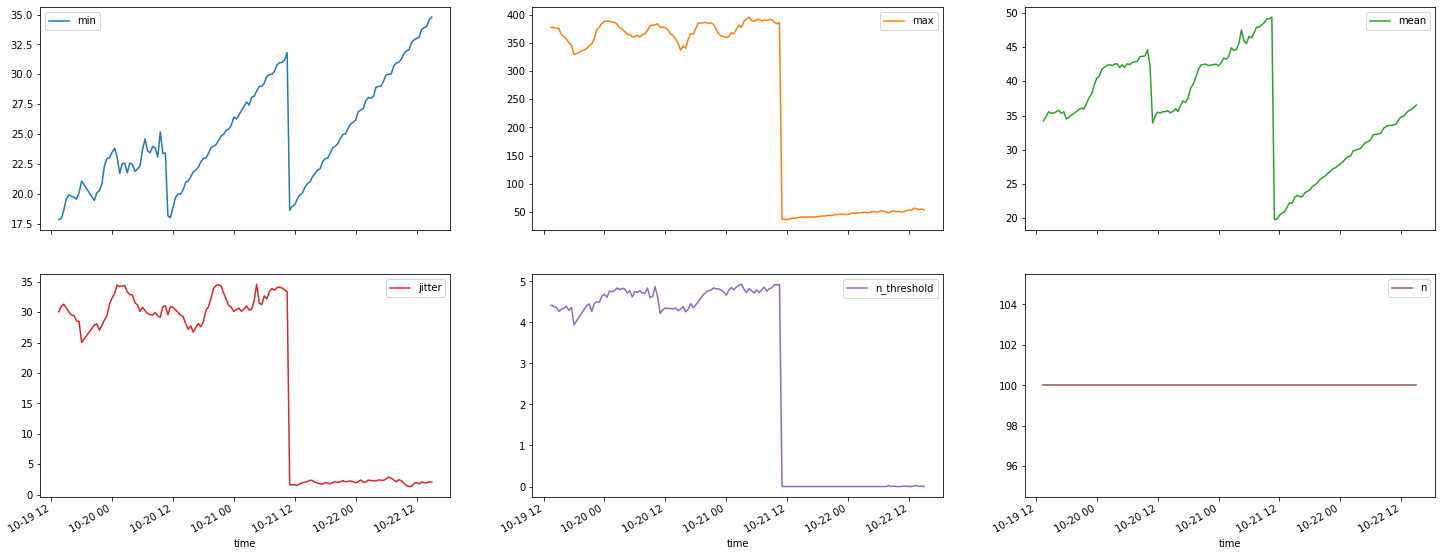

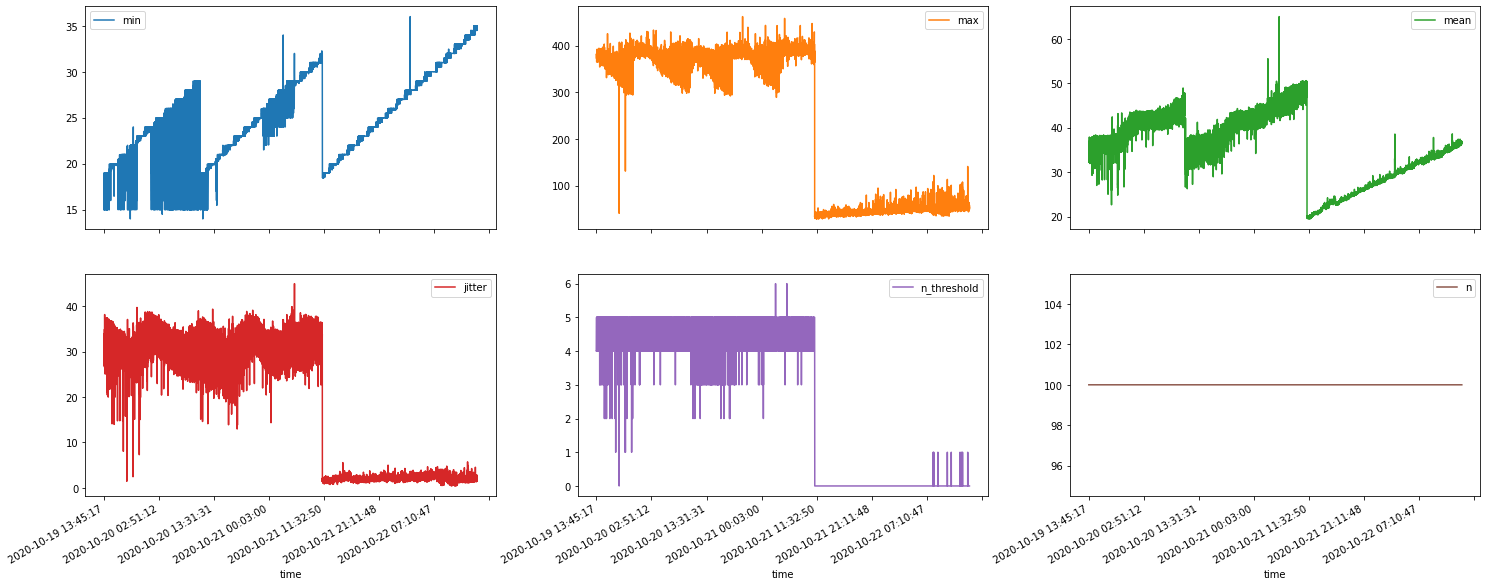

In [31]:
ping_data = pd.read_csv(
    "league_ping_data.csv",
    header=None,
    names=["time", "min", "max", "mean", "jitter", "n_threshold", "n"],
    index_col="time",
)
ping_data.groupby(
    by=[pd.DatetimeIndex(ping_data.index).floor("30 min").rename("time"),]
).mean().plot(subplots=True, figsize=(25, 10), layout=(2, 3))

ping_data.plot(subplots=True, figsize=(25, 10), layout=(2, 3))

summary_df = ping_data.groupby(
    by=[
        pd.DatetimeIndex(ping_data.index).floor(freq).day.rename("day"),
        pd.DatetimeIndex(ping_data.index).floor(freq).hour.rename("hour"),
        #         pd.DatetimeIndex(ping_data.index).floor(freq).minute.rename("minute"),
    ]
).agg(
    {
        "min": "mean",
        "max": "mean",
        "mean": "mean",
        "jitter": "mean",
        "n_threshold": "sum",
        "n": "sum",
    }
)
summary_df["pct_above_threshold"] = 100 * summary_df["n_threshold"] / summary_df["n"]
summary_df.round({"min": 1, "max": 1, "mean": 1, "jitter": 1, "pct_above_threshold": 2})